# Часть 1. Проверка гипотезы в Python и составление аналитической записки

## Проверка гипотезы сервиса Яндекс Книги по городам Москва и Санкт-Петербург

- Автор:Ахметдинова Айсылу Газинуровна
- Дата:14.05.2025

## Цели и задачи проекта

Цель проекта проверить: действительно ли пользователи из Москвы проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Санкт-Петербурга. Для этого нам нужно будет проверить данные, провести анализ и по результатам анализа данных подготовить аналитическую записку.


## Описание данных

Таблицы этого проекта содержат данные о чтении и прослушивании контента в сервисе Яндекс Книги, которые включают информацию о пользователях, платформах, времени, длительности сессий и типах контента. Данные представлены за период с 1 сентября по 11 декабря 2024 года. В нашем распоряжении будет несколько таблиц.

**Таблица bookmate.audition** содержит данные об активности пользователей и состоит из следующих полей:
- audition_id — уникальный идентификатор сессии чтения или прослушивания;
- puid — идентификатор пользователя;
- usage_platform_ru — название платформы, с помощью которой пользователь слушал контент;
- msk_business_dt_str — дата события в формате строки (московское время);
- app_version — версия приложения, которая использовалась для чтения или прослушивания;
- adult_content_flg — был ли это контент для взрослых: True или False;
- hours — длительность чтения или прослушивания в часах;
- hours_sessions_long — продолжительность длинных сессий чтения или прослушивания в часах;
- kids_content_flg — был ли это детский контент: True или False;
- main_content_id — идентификатор основного контента;
- usage_geo_id — идентификатор географического местоположения.

**Таблица bookmate.content**содержит данные о контенте и состоит из следующих полей:
- main_content_id — идентификатор основного контента;
- main_author_id — идентификатор основного автора контента;
- main_content_type — тип контента;
- main_content_name— название контента;
- main_content_duration_hours — длительность контента в часах;
- published_topic_title_list — список жанров контента.

**Таблица bookmate.author** содержит данные об авторах контента и состоит из следующих полей:
- main_author_id — идентификатор основного автора контента;
- main_author_name — имя основного автора контента.

**Таблица bookmate.geo** содержит данные о местоположении и состоит из следующих полей:
- usage_geo_id — идентификатор географического положения;
- usage_geo_id_name — город или регион географического положения;
- usage_country_name — страна географического положения.

## Содержимое проекта

**1. Загрузка данных и знакомство с ними.** Проверка на наличие дубликатов в идентификаторах пользователей. Сравнение размера групп, их статистики и распределения.

**2. Проверка гипотезы в Python.**

Нулевая гипотеза  𝐻0:𝜇СПб≤𝜇Москва
 
Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза  𝐻1:𝜇СПб>𝜇Москва
 
Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

**3. Аналитическая записка.** Интерпретация результатов.

## 1. Загрузка данных и знакомство с ними

Загрузим данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
# Загрузим данные и выведем основную информацию по датафрейму
import pandas as pd
df = pd.read_csv('/datasets/yandex_knigi_data.csv')
display(df.head())
display(df.info())

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


None

В датафрейме 8784 строк, пропусков нет, типы данных соответствуют данным, названия столбцов в одном регистре и понятны по описанию.

In [2]:
# Проверим наличие дубликатов в идентификаторах пользователей
duplicates = df['puid'].duplicated().sum()
print(f"Количество дубликатов в puid: {duplicates}")


Количество дубликатов в puid: 244


In [3]:
# Удалим дубликаты 
df = df.drop_duplicates(subset='puid', keep='first')
# Проверим на дубликаты после удаления
duplicates = df['puid'].duplicated().sum()
print(f"Количество дубликатов в puid после удаления: {duplicates}")

Количество дубликатов в puid после удаления: 0


В данном этапе мы проверили данные на наличие дубликатов в идентификаторах пользователей. Было обнаружено 244 дубликата, их мы удалили.

In [4]:
# Сравним размеры групп по городам
group_moscow = df[df['city'] == 'Москва']['hours']
group_spb = df[df['city'] == 'Санкт-Петербург']['hours']

print(f"Размер группы Москва: {len(group_moscow)}")
print(f"Размер группы Санкт-Петербург: {len(group_spb)}")

# Вычислим и сравним основные статистики
print("\nСтатистики для группы Москва:")
print(group_moscow.describe())

print("\nСтатистики для группы Санкт-Петербург:")
print(group_spb.describe())
 
    


Размер группы Москва: 6234
Размер группы Санкт-Петербург: 2306

Статистики для группы Москва:
count    6234.000000
mean       10.881092
std        36.851683
min         0.000018
25%         0.059903
50%         0.924498
75%         5.939972
max       857.209373
Name: hours, dtype: float64

Статистики для группы Санкт-Петербург:
count    2306.000000
mean       11.264433
std        39.831755
min         0.000025
25%         0.060173
50%         0.875355
75%         6.138424
max       978.764775
Name: hours, dtype: float64


  Группа пользователей из Москвы(6234) значительно больше группы пользователей из Санкт-Петербурга(2306). Большая разница в размерах групп может повлиять на мощность статистического теста.  Среднее время активности немного выше в Санкт-Петербурге, но разница небольшая.  В обеих группах наблюдается большой разброс данных (высокое стандартное отклонение) и наличие выбросов (очень высокие максимальные значения). Это означает, что поведение пользователей сильно варьируется. Построим гистограмму, чтобы лучше понять распределение данных и выявить выбросы.

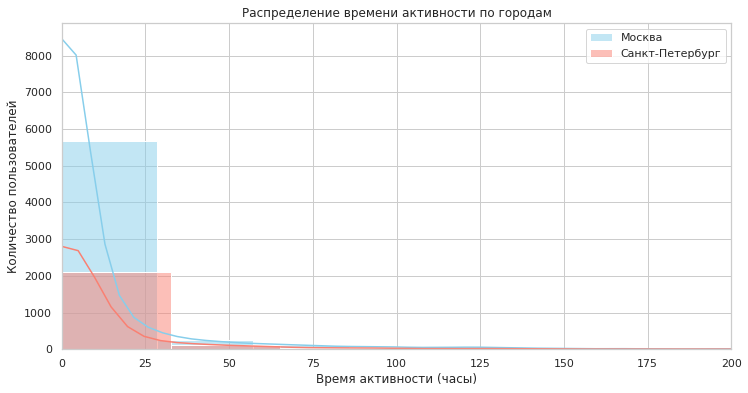

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настроим стиль графиков
sns.set(style="whitegrid")

# Создаем гистограмму
plt.figure(figsize=(12, 6))

# Гистограмма для Москвы
sns.histplot(df[df['city'] == 'Москва']['hours'],
             kde=True, 
             label='Москва',
             color='skyblue',
             bins=30)  

# Гистограмма для Санкт-Петербурга
sns.histplot(df[df['city'] == 'Санкт-Петербург']['hours'],
             kde=True, 
             label='Санкт-Петербург',
             color='salmon',
             bins=30) 

# Настроим график
plt.xlabel('Время активности (часы)')
plt.ylabel('Количество пользователей')
plt.title('Распределение времени активности по городам')
plt.legend()
plt.xlim(0,200)
plt.show()

По гистограмме видим, что действительно в данных присутствуют выбросы. 

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуем статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

 Проведем стстистический т-тест Уэлча. Этот тест более устойчив к различиям в размерах групп и дисперсиях.

In [6]:
import pandas as pd
from scipy import stats


# Фильтруем данные по городам
moscow_data = df[df['city'] == 'Москва']['hours']
spb_data = df[df['city'] == 'Санкт-Петербург']['hours']

# Проведем односторонний t-теста
alpha = 0.05
result = stats.ttest_ind(spb_data, moscow_data, alternative='greater', equal_var=False) 

p_value = result.pvalue

print(f"p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средняя активность пользователей в Санкт-Петербурге статистически значимо больше, чем в Москве.")
else:
    print("Не можем отвергнуть нулевую гипотезу: нет статистически значимого различия в средней активности пользователей между Санкт-Петербургом и Москвой.")


p-value: 0.3435708118766314
Не можем отвергнуть нулевую гипотезу: нет статистически значимого различия в средней активности пользователей между Санкт-Петербургом и Москвой.


## 3. Аналитическая записка


Подведем итоги. В данной работе была выполнена очистка данных от дубликатов пользователей, были сформированы выборки по городам Москва и Санкт-Петербург.
- Для проверки гипотезы был выбран односторонний t-тест Уэлча. Обоснование выбора: t-тест Уэлча был выбран, поскольку он не предполагает равенство дисперсий между группами и устойчив к различиям в размерах выборок, что важно, учитывая существенную разницу в количестве пользователей в Москве и Санкт-Петербурге. Уровень статистической значимости (alpha) был установлен на 0.05.
- По результатам теста p-value = 0.3435708118766314
- Поскольку p-value (0.3436) превышает установленный уровень значимости (0.05), мы не можем отвергнуть нулевую гипотезу.На основе проведенного t-теста Уэлча, нет статистически значимых доказательств того, что средняя активность пользователей в Санкт-Петербурге больше, чем в Москве. Следовательно, гипотеза о том, что пользователи из Санкт-Петербурга в среднем проводят больше времени за чтением и прослушиванием книг в приложении, не находит статистического подтверждения.
- Возможные причины полученных результатов: недостаточная мощность теста, выбросы в данных,либо неучтенные данные, как сезонность.

----

# Часть 2. Анализ результатов A/B-тестирования

## 1. Цель исследования.



Цель исследования — провести оценку результатов A/B-теста и убедиться(либо опровергнуть), что упрощение интерфейса интернет-магазина BitMotion Kit приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта. Оцените корректность проведения теста и проанализируйте его результаты.
Задачи:

- загрузить данные теста;
- проверить корректность его проведения;
- проанализировать полученные результаты.

## 2. Загрузка данных, оценка их целостности.


In [7]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)
display("Первые 5 строк таблицы participants:")
display(participants.head())
display("Информация о таблице participants:")
display(participants.info())
display("Проверка на наличие пропусков в таблице participants:")
display(participants.isnull().sum())
display("Проверка на наличие дубликатов в таблице participants:")
display(participants.duplicated().sum())

display("Первые 5 строк таблицы events:")
display(events.head())
display("Информация о таблице events:")
display(events.info())
display("Проверка на наличие пропусков в таблице events:")
display(events.isnull().sum())
display("Проверка на наличие дубликатов в таблице events:")
display(events.duplicated().sum())


'Первые 5 строк таблицы participants:'

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


'Информация о таблице participants:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


None

'Проверка на наличие пропусков в таблице participants:'

user_id    0
group      0
ab_test    0
device     0
dtype: int64

'Проверка на наличие дубликатов в таблице participants:'

0

'Первые 5 строк таблицы events:'

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


'Информация о таблице events:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


None

'Проверка на наличие пропусков в таблице events:'

user_id            0
event_dt           0
event_name         0
details       538264
dtype: int64

'Проверка на наличие дубликатов в таблице events:'

36318

Данные в таблице participants в порядке, типы данных соответствуют, пропуски и дубликаты не обнаружены.
В таблице events также типы данных соответствуют, обнаружены пропуски в количестве 538264 в столбце details с дополнительными данными о событии и дубликаты в количестве 36318. Дубликаты мы далее удалим, а пропуски оставим,так как их достаточно много и они не повлияют на основное исследование. 

In [8]:
events = events.drop_duplicates()
display(events.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750968 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     750968 non-null  object        
 1   event_dt    750968 non-null  datetime64[ns]
 2   event_name  750968 non-null  object        
 3   details     244905 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 28.6+ MB


None

## 3. По таблице `ab_test_participants` оценим корректность проведения теста:

   3\.1 Выделим пользователей, участвующих в тесте, и проверим:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [9]:
# Выделим уникальные тесты, представленные в данных
display("Уникальные тесты, представленные в данных:")
display(participants['ab_test'].unique())


'Уникальные тесты, представленные в данных:'

array(['interface_eu_test', 'recommender_system_test'], dtype=object)

In [10]:
#Отфильтруем пользователей, которые принимали участие в interface_augmenting_test
interface_eu_test_participants = participants[participants['ab_test'] == 'interface_eu_test']
display("Количество участников в interface_eu_test:")
display(len(interface_eu_test_participants))

#Отфильтруем пользователей, которые принимали участие в recommender_system_test
recommender_system_test_participants = participants[participants['ab_test'] == 'recommender_system_test']
display("Количество участников в recommender_system_test:")
display(len(recommender_system_test_participants))



'Количество участников в interface_eu_test:'

10850

'Количество участников в recommender_system_test:'

3675

In [11]:
# Проверим равномерность распределения пользователей по группам теста
display("Распределение пользователей по группам в interface_eu_test_participants:")
display(interface_eu_test_participants['group'].value_counts(normalize=True))

display("Распределение пользователей по группам в recommender_system_test_participants:")
display(recommender_system_test_participants['group'].value_counts(normalize=True))

'Распределение пользователей по группам в interface_eu_test_participants:'

B    0.503871
A    0.496129
Name: group, dtype: float64

'Распределение пользователей по группам в recommender_system_test_participants:'

A    0.747483
B    0.252517
Name: group, dtype: float64

In [12]:
# Найдем пользователей, участвующих одновременно в двух тестовых группах
interface_test = participants[participants['ab_test'] == 'interface_eu_test']['user_id'].unique()
recommender_test = participants[participants['ab_test'] == 'recommender_system_test']['user_id'].unique()

intersection = list(set(interface_test) & set(recommender_test))
display("Количество пользователей, участвующих одновременно в двух тестовых группах")
display(len(intersection)) 

'Количество пользователей, участвующих одновременно в двух тестовых группах'

887

In [13]:
# Удалим этих пользователей из обеих групп
participants = participants[~participants['user_id'].isin(intersection)] 

Выяснили, что в данных представлены два вида тестовых групп: interface_eu_test и recommender_system_test с количеством участников 10850 и 3675 соответственно. Распределение пользователей в тестовой группе interface_eu_test_participants равномерное: A - 0.496129, B - 0.503871, в группе recommender_system_test пользователи распределяются неравномерно:A - 0.747483, B - 0.252517. Выявили и удалили 887 пользователей, участвующих одновременно в двух тестовых группах. 


3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [14]:
# Фильтруем датафрейм по типу теста
filtered_participants = participants[participants['ab_test'] =='interface_eu_test']
# Обьединим с таблицей с событиями
df_test = pd.merge(filtered_participants, events, on='user_id', how='left')
display(df_test.head())
#Проверим, что в столбце ab_test только одно значение interface_eu_test
display("Уникальные значения столбца ab_test в объединенной таблице:")
display(df_test['ab_test'].unique())

,user_id,group,ab_test,device,event_dt,event_name,details
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,registration,-2.38
1,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:49,login,NaN
2,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:57,login,NaN
3,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:38:54,login,NaN
4,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-08 22:15:35,login,NaN


'Уникальные значения столбца ab_test в объединенной таблице:'

array(['interface_eu_test'], dtype=object)

Создали таблицу df_test, где оставили только события, связанные с участвующими в изучаемом тесте interface_eu_test пользователями.

- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [15]:
# Фильтруем события регистрации и получим даты первой регистрации
registrations = df_test[df_test['event_name'] == 'registration'].groupby('user_id')['event_dt'].min().reset_index()
registrations = registrations.rename(columns={'event_dt': 'registration_dt'})

# Объединим с исходными данными
merged_data = pd.merge(df_test, registrations, on='user_id', how='left')

# Рассчитаем время жизни
merged_data['lifetime'] = (merged_data['event_dt'] - merged_data['registration_dt']).dt.days

# Фильтруем по времени жизни (первые 7 дней)
filtered_lifetime_events = merged_data[merged_data['lifetime'] < 7]

# Выводим результаты
display("Первые 5 строк merged_data:")
display(merged_data.head())
display("Пропуски в registration_dt:", merged_data['registration_dt'].isnull().sum())
display(f"Размер исходной таблицы событий ({'interface_eu_test'}): {len(df_test)}")
display(f"Размер отфильтрованной таблицы событий ({'interface_eu_test'}, lifetime < 7 дней): {len(filtered_lifetime_events)}")


'Первые 5 строк merged_data:'

,user_id,group,ab_test,device,event_dt,event_name,details,registration_dt,lifetime
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,registration,-2.38,2020-12-07 04:37:31,0
1,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:49,login,NaN,2020-12-07 04:37:31,0
2,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:57,login,NaN,2020-12-07 04:37:31,0
3,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:38:54,login,NaN,2020-12-07 04:37:31,0
4,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-08 22:15:35,login,NaN,2020-12-07 04:37:31,1


'Пропуски в registration_dt:'

0

'Размер исходной таблицы событий (interface_eu_test): 68074'

'Размер отфильтрованной таблицы событий (interface_eu_test, lifetime < 7 дней): 58692'

 Здесь рассчитали время жизни события, совершенного пользователем после регистрации и оставили только те события, которые были выполнены в течение первых семи дней с момента регистрации. До фильтрации в таблице было 68074 событий, после осталось 58692.

Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

Для оценки размера выборки А/В теста применим калькулятор Эвана Миллера. Введем наши показатели
- Baseline Conversion Rate, или базовый уровень конверсии — 30%,
- Minimum Detectable Effect, или минимальный детектируемый эффект - 3%,
- Statistical power 1 - β, или мощность — 80%,
- Significance level α, или уровень значимости - 5%

После ввода данных калькулятор рассчитал для каждой из двух групп необходимый размер выборки Sample size - 3692, который нужно набрать для получения статистически значимого результата. 

- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [16]:
# Фильтруем события, оставляя только покупки
purchases = filtered_lifetime_events[filtered_lifetime_events['event_name'] == 'purchase']

# Рассчитываем количество уникальных покупателей в каждой группе(успех)
purchasers = purchases.groupby('group')['user_id'].nunique()

# Рассчитываем общее количество уникальных посетителей в каждой группе
total_visitors = filtered_lifetime_events.groupby('group')['user_id'].nunique()

# Объединяем результаты в один DataFrame
result = pd.DataFrame({'purchasers': purchasers, 'total_visitors': total_visitors})

# Рассчитываем конверсию в покупку для каждой группы
result['conversion_rate'] = result['purchasers'] / result['total_visitors']

display(result)

# Получаем значения конверсии для каждой группы
conversion_A = result.loc['A', 'conversion_rate'] if 'A' in result.index else 0
conversion_B = result.loc['B', 'conversion_rate'] if 'B' in result.index else 0

# Рассчитываем разницу в конверсии между группами
difference = conversion_B - conversion_A

display(f"Разница в конверсии между группами (B - A): {difference:.4f}")



,purchasers,total_visitors,conversion_rate
group,,,
A,1377,4952,0.278069
B,1480,5011,0.295350


'Разница в конверсии между группами (B - A): 0.0173'

- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

Предварительный вывод: Конверсия в покупку в тестовой группе B выше, чем в контрольной группе A на 1.7%. Это указывает на положительное влияние изменений в тестовой группе, но ожидаемого увеличения конверсии в 3% не случилось.  Необходимый размер выборки (Sample size - 3692), который нужно набрать для получения статистически значимого результата соответствует требованиям анализа.

## 4. Проведем оценку результатов A/B-тестирования:

- Проверим изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

 Формулировка гипотез
H0: Конверсия в покупку в группе B не отличается от конверсии в группе A
H1: Конверсия в покупку в группе B больше, чем конверсия в группе A

In [17]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Подготовим данные для z-теста
successes = np.array([result.loc['B', 'purchasers'], result.loc['A', 'purchasers']])  # Количество успехов (покупок)
trials = np.array([result.loc['B', 'total_visitors'], result.loc['A', 'total_visitors']])  # Общее количество испытаний (посетителей)

# Проведем z-тест
alpha = 0.05  # Уровень значимости
z_stat, p_value = proportions_ztest(successes, trials, alternative='larger')  # Односторонний z-тест (H1: B > A)

display(f"Z-статистика: {z_stat:.2f}")
display(f"P-value: {p_value:.3f}")

if p_value < alpha:
    display("Отвергаем нулевую гипотезу: Есть статистически значимые доказательства того, что конверсия в покупку в группе B больше, чем в группе A.")
else:
    display("Не можем отвергнуть нулевую гипотезу: Нет статистически значимых доказательств того, что конверсия в покупку в группе B больше, чем в группе A.")

'Z-статистика: 1.91'

'P-value: 0.028'

'Отвергаем нулевую гипотезу: Есть статистически значимые доказательства того, что конверсия в покупку в группе B больше, чем в группе A.'

- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

# Выводы
- В данных представлены два вида тестовых групп: interface_eu_test и recommender_system_test с количеством участников 10850 и 3675 соответственно. 
- Распределение пользователей в тестовой группе interface_eu_test_participants равномерное: A - 0.496129, B - 0.503871, в группе recommender_system_test пользователи распределяются неравномерно:A - 0.747483, B - 0.252517. 
- Были удалены 887 пользователей, участвовавших в нескольких тестах.
- Горизонт анализа: 7 дней после регистрации. Количество событий до фильтрации по времени жизни: 68074 Количество событий после фильтрации по времени жизни: 58692
- Необходимый размер выборки (рассчитанный): 3692 пользователя на группу,что соответствует предоставленным данным.
- Конверсия в группе B (тестовая) выше, чем в группе A (контрольная) на 1.7%.
- Использован z-тест для пропорций для сравнения конверсий между группами. Z-статистика: 1.91, P-value: 0.028. P-value (0.028) меньше, чем установленный уровень значимости (0.05), что позволяет нам отвергнуть нулевую гипотезу.


Результаты A/B-тестирования показывают статистически значимое увеличение конверсии в покупку в тестовой группе B по сравнению с контрольной группой A. Это означает, что изменения в интерфейсе, представленные в тестовой группе, оказали положительное влияние на поведение пользователей и увеличили вероятность совершения покупки.
Увеличение конверсии на 1.7% является статистически значимым, но относительно небольшим. Ожидаемого увеличения конверсии на 3% не было достигнуто.
